# Here we load the data and print some of them
See http://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [2]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

Note the %matplotlib inline command to make the figure appear directly under the code cell

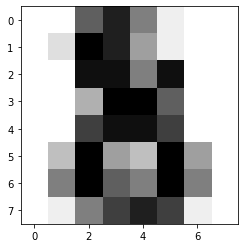

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

See http://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting

Please note that all the samples except the last one are used for training, while the last sample is used for testing (predicting)

In [6]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001)

In [7]:
clf.predict(digits.data[-1:])

array([8])

# Store a model into disk
See http://scikit-learn.org/stable/tutorial/basic/tutorial.html#model-persistence

In [8]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(digits.data[-1:])

array([8])

In [11]:
import joblib
joblib.dump(clf, 'mysavedmodel.pkl') 
clf3 = joblib.load('mysavedmodel.pkl') 
clf3.predict(digits.data[-1:])

array([8])

# Retrain a previously trained model
See http://scikit-learn.org/stable/tutorial/basic/tutorial.html#refitting-and-updating-parameters

In [12]:
clf.set_params(kernel='linear').fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, gamma=0.001, kernel='linear')

In [13]:
clf.predict(digits.data[-1:])

array([8])

In [14]:
aa=[11,22,33,44,55]
aa[-1:]

[55]

In [15]:
digits.target[:-1]

array([0, 1, 2, ..., 0, 8, 9])

# Multiclass versus multilabel classification
See http://scikit-learn.org/stable/tutorial/basic/tutorial.html#multiclass-vs-multilabel-fitting

Please note that all the samples except the last one are used for training, while the last sample is used for testing (predicting). If multilabel classification is used, then it is possible that a sample is classified into zero, one or more classes, i.e. it is not guaranteed that the resulting label vector has all 0s except a single 1.


In [16]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

iris = datasets.load_iris()
classif = OneVsRestClassifier(estimator=SVC(random_state=0))
clf4=classif.fit(iris.data[:-1], iris.target[:-1])
clf4.predict(iris.data[-1:])

array([2])

In [17]:
y = LabelBinarizer().fit_transform(iris.target)
clf5=classif.fit(iris.data[:-1], y[:-1])
clf5.predict(iris.data[-1:])

array([[0, 0, 1]])